# Mongolian TTS Transfer Learning with Tacotron

This is a Mongolian text to speech transfer learning demo using  [tugstugi/Tacotron-2](https://github.com/tugstugi/Tacotron-2) (this is a fork of [Rayhane-mamah/Tacotron-2](https://github.com/Rayhane-mamah/Tacotron-2))

First, a Tacotron2 model was trained using a 5 hours Mongolian Bible dataset for 150K steps: [5 hours Mongolian Bible TTS demo](https://colab.research.google.com/github/tugstugi/mongolian-nlp/blob/master/misc/Tacotron_MongolianTTS.ipynb)

After that, a 10 minutes dataset created from a speech of the former Mongolian president Elbegdorj using this video:



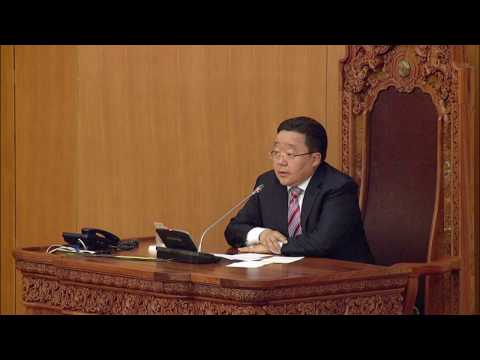

In [1]:
import IPython
from IPython.display import YouTubeVideo
YouTubeVideo(id='IgekYdZqUrM', width=600, height=300)

With this 10 minutes dataset, the pretrained Tacotron model was fine tuned for 50K more steps.

To execute this demo, click on "**Runtime->Run All**" (Google account required).

For more Mongolian TTS demos, visit [tugstugi/mongolian-nlp#mongolian-tts](https://github.com/tugstugi/mongolian-nlp#mongolian-tts).

## Setup

### Install dependencies

In [2]:
%tensorflow_version 1.x
import os
from os.path import exists, join, expanduser

import IPython
from IPython.display import Audio, clear_output

# pyaudio needs this system dependency!
!apt-get install -qq portaudio19-dev > /dev/null
# clone Tacotron-2 and install dependencies
if not exists('Tacotron-2'):
  !git clone https://github.com/tugstugi/Tacotron-2.git && cd Tacotron-2 && pip install -q -r requirements.txt

ValueError: Tensorflow 1 is unsupported in Colab.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

### Download a pretrained model

In [ ]:
if not exists('Tacotron-2/logs-Tacotron/taco_pretrained'):
  # download pretrained model from the Google Drive link
  pretrained_file_id = "1LHjqCbaQIuOkxeW07N7jejUYXyckYYJq"
  pretrained_file_name = "taco_pretrained.tar.gz"
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={pretrained_file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={pretrained_file_id}" -o {pretrained_file_name}
  # extract it
  !mkdir Tacotron-2/logs-Tacotron/
  !tar xvfz {pretrained_file_name} --directory Tacotron-2/logs-Tacotron/

## Synthesize

### Allowed characters

абвгдеёжзийклмноөпрстуүфхцчшъыьэюя-.,!?

### Sentences to synthesize

The 10 minutes dataset is very noise and contains very fast and also very slow speeches. So the generated speech will be also sometimes very fast and sometimes very slow! Longer texts will not work well.

In [ ]:
SENTENCES = [
    "Би үнэнээ хэлье. Би Эрдэнэт үйлдвэрт шахаа хийдэг байсан.",
    "Би дандаа худлаа ярьдаг байсан.",
    "Намбарын Энхбаяр миний хамгийн сайн найз байсан.",
    "Би ерөнхий сайд байж үзээгүй ээ.",
    "Энэ бол миний төрсөн нутаг. Монголын сайхан орон."
]
text_list = "\n".join(SENTENCES)

### Synthetize on CPU

In [ ]:
# synthesize with Tacotron
!cd Tacotron-2/ && python simple-synthesize.py --text_list "{text_list}"

# show the text and WAV files
clear_output()
for i in range(len(SENTENCES)):
  print(SENTENCES[i])
  IPython.display.display(Audio('Tacotron-2/tacotron_output/logs-eval/wavs/wav-batch_%i_sentence_0-linear.wav' %i, rate=22050))